# MNIST Hand Written digit classification

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
(x_train,y_train), (x_test,y_test)= tf.keras.datasets.mnist.load_data()

In [3]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


### Visualizing the Dataset 

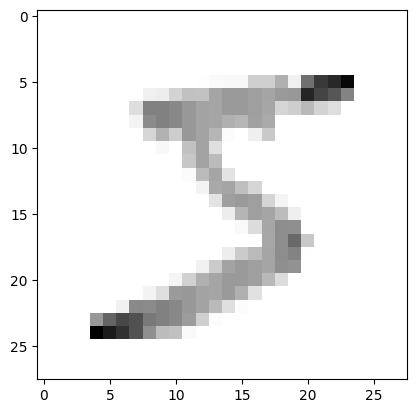

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [6]:
model=Sequential([
    tf.keras.Input(shape=x_train.shape[1:]),
    tf.keras.layers.Flatten(),
    Dense(50, activation= 'relu'),
    Dense(25, activation= 'relu'),
    Dense(10, activation= 'linear')
])

In [7]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
Total params: 40,785
Trainable params: 40,785
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(x_train,y_train,epochs=25,batch_size=128, validation_data=(x_test,y_test))

Epoch 1/25
469/469 [==============================] - 3s 3ms/step - loss: 0.5389 - accuracy: 0.8547 - val_loss: 0.2599 - val_accuracy: 0.9224
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.2306 - accuracy: 0.9330 - val_loss: 0.1963 - val_accuracy: 0.9415
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1800 - accuracy: 0.9477 - val_loss: 0.1662 - val_accuracy: 0.9487
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.1506 - accuracy: 0.9559 - val_loss: 0.1482 - val_accuracy: 0.9556
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1287 - accuracy: 0.9616 - val_loss: 0.1419 - val_accuracy: 0.9578
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1141 - accuracy: 0.9661 - val_loss: 0.1312 - val_accuracy: 0.9607
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1000 - accuracy: 0.9702 - val_loss: 0.1246 - val_accuracy: 0.9624
Epoch 

In [12]:
prediction=model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [13]:
prediction=tf.nn.softmax(prediction)

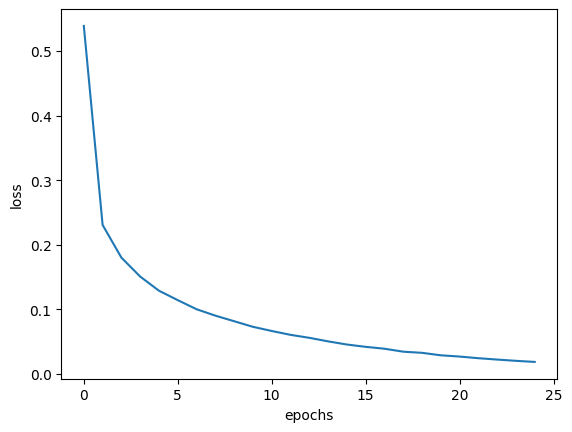

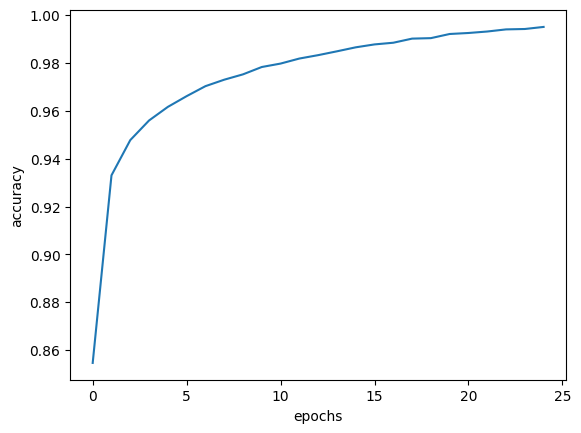

In [19]:
plt.plot(history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


Predicted number: 9
actual number:9


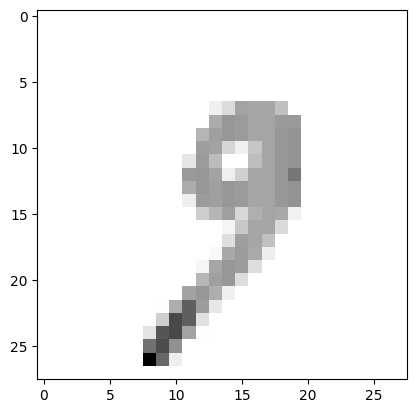

Predicted number: 0
actual number:0


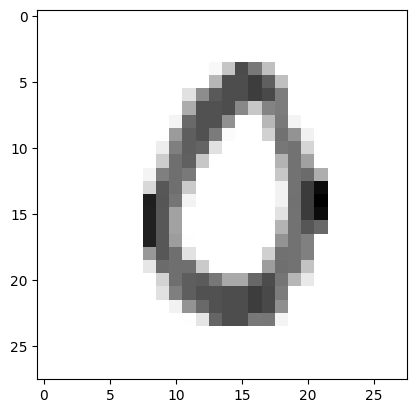

In [35]:
pred=np.argmax(prediction, axis=1)

for i in range(2):
    print(f"Predicted number: {pred[1000+i]}")
    print(f"actual number:{y_test[1000+i]}")
    plt.imshow(x_test[1000+i],cmap=plt.cm.binary)
    plt.show()
    
    

### Accuracy of the network: 99.50%